# Convolution

_____________________________________________________________________________________________________________________

Convolution is a mathematical operation used to express the relation between input and output of an linear time invariant  system. It relates input, output and impulse response of an LTI system .A convolution is an integral that expresses the amount of overlap of one function g as it is shifted over another function f. It therefore merges/convolutes one function with another.
![](.\img1\conv1.jpg)



Convolving or filtering  a signal  is a CPU-intensive operation. 
As the convolution kernel and image size increases in size, convolution becomes more and more processor intensive.
Convolution in Coordinate Space is equivalent to multiplication in Frequency space. Using Fourier mathematics  greatly decreases the computational CPU expense required to perform the filtering operation.we will be learning about fourier mathematics in upcoming lessons 

##### Examples  modeled as a convolution: 
- Image blurring in a shaky camera
- Echoes in long distance telephone calls
- The finite bandwidth of analog sensors and electronics

The convolution operaton will be depicted as shown below 

### y(t)=x(t)∗h(t)

Where ,

- y (t) = output of system

- x (t) = input of system

- h (t) = impulse response of system

There are two types of convolutions:

1. Continuous convolution

2. Discrete convolution






##### what is impulse Response? 

In signal processing, the impulse response, or impulse response function (IRF), of a dynamic system is its output when presented with a brief input signal, called an impulse. More generally, an impulse response is the reaction of any dynamic system in response to some external change. In both cases, the impulse response describes the reaction of the system as a function of time (or possibly as a function of some other independent variable that parameterizes the dynamic behavior of the system).



In [63]:
# Sample  impulse response of a system 

Impulse_response = [
  -0.0018225230, -0.0015879294, +0.0000000000, +0.0036977508, +0.0080754303, +0.0085302217, -0.0000000000, -0.0173976984,
  -0.0341458607, -0.0333591565, +0.0000000000, +0.0676308395, +0.1522061835, +0.2229246956, +0.2504960933, +0.2229246956,
  +0.1522061835, +0.0676308395, +0.0000000000, -0.0333591565, -0.0341458607, -0.0173976984, -0.0000000000, +0.0085302217,
  +0.0080754303, +0.0036977508, +0.0000000000, -0.0015879294, -0.0018225230
]

##### What is delta function ? 

The simplest impulse response is nothing more that a delta function. An impulse on the input produces an identical impulse on
the output. This means that all signals are passed through the system without change. Convolving any signal with a delta function results in exactly the same signal.

If the delta function is made larger or smaller in amplitude, the
resulting system is an amplifier or attenuator, respectively. 
In equation form, 
- Amplification results if k is greater than one 
- Attenuation results if k is less than one

##### x [n] *  kδ[n] = k x[n] 


### Program to visualize the signals 

Let us polot the input signal and the impulse respone which has been defined previously

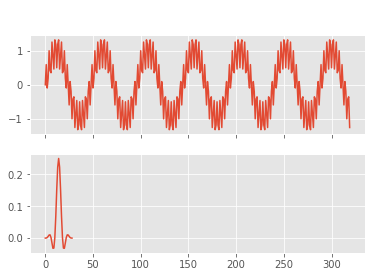

In [83]:
from matplotlib import pyplot as plt
import mysignals as sigs
from matplotlib import style


style.use('ggplot')

f, plt_arr =plt.subplots(2,sharex=True)
f.suptitle("Input signal and impulse response")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz)
plt_arr[1].plot(Impulse_response)
plt.show()

### Convolution program example ( Built in function) 

Here we will be implementing the Convolution of imput signal with predefined impulse response to get the desired convoluted ouput . Here the convoluted output is a low pass filter which has been designed by utilizing the proper impulse respone to filter only the low frequency signals 



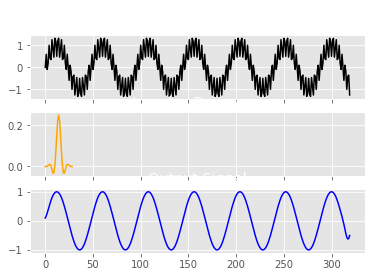

In [34]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import signal


# Here we are using the convolution functon using scipy library 

output_signal = signal.convolve(sigs.InputSignal_1kHz_15kHz,Impulse_response, mode='same')

style.use('ggplot')


f,plt_arr = plt.subplots(3,sharex=True)
f.suptitle("Convolution")
plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz, color ='black')
plt_arr[0].set_title("Input Signal")
plt_arr[1].plot(Impulse_response, color ='orange')
plt_arr[1].set_title("Impulse Response")
plt_arr[2].plot(output_signal, color ='blue')
plt_arr[2].set_title("Output Signal")

plt.show()

As  designed, only the low frequency components are filtered out from the input signal after convoluting the input with impulse response

###  To compute convolution ( without built in modules ) 

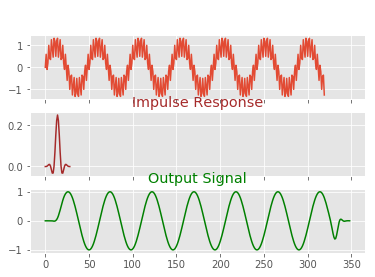

In [70]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import csv



csvfile = "conv_output_signal.txt"

# This is the function which will calculate the convolution 
def convolution(sig_src_arr,imp_response_arr,sig_dest_arr):
    for x in range(len(sig_src_arr)+len(imp_response_arr)):
        sig_dest_arr[x] =0

    for x in range(len(sig_src_arr)):
        for y in range(len(imp_response_arr)):
            sig_dest_arr[x+y] = sig_dest_arr[x+y]+sig_src_arr[x]*imp_response_arr[y]

    with open(csvfile,"w") as output:
        writer = csv.writer(output,lineterminator =',')
        for x in sig_dest_arr:
            writer.writerow([x])

    style.use('ggplot')
    
    f,plt_arr =plt.subplots(3,sharex=True)
    f.suptitle("Convolution")
    
    plt_arr[0].plot(sig_src_arr)
    plt_arr[0].set_title("Input Signal")
    
    plt_arr[1].plot(imp_response_arr, color = 'brown')
    plt_arr[1].set_title("Impulse Response", color ='brown')
    
    plt_arr[2].plot(sig_dest_arr, color ='green')
    plt_arr[2].set_title("Output Signal", color='green')

    plt.show()
    
output_signal = [None]*349
convolution(sigs.InputSignal_1kHz_15kHz,Impulse_response,output_signal)



### Deconvolution 

Unwanted convolution is an inherent problem in transferring analog information.



Deconvolution is the process of filtering a signal to compensate for an undesired convolution. The main goal of deconvolution is to recreate the signal as it existed before the convolution took place. This usually requires the characteristics of the convolution  to be known. This can be distinguished from blind deconvolution, where the characteristics of the parasitic convolution are not known. Blind deconvolution is a much more difficult problem that has no general solution, and the approach must be tailored to the particular application.

Deconvolution is nearly impossible to understand in the time domain but quite straightforward in the frequency domain. Each sinusoid that composes the original signal can be changed in amplitude and phase as it passes through the undesired convolution. To extract the original signal, the deconvolution filter must undo these amplitude and phase changes.

##### Python example for Deconvolution 

Let us take a 1D input signal and then convolute the same with the filter defined . then to obtain back the input result we have to deconvolute the filter and the output obtained to get back the input signal 

In [89]:
from scipy import signal
import numpy as np


sig = np.array([0,0,0,0,1,1,1,1])
filter = np.array([1,1,0])
print("\n The Input signal is\n " )
print(sig)

conv_result = signal.convolve(sig,filter)
deconv_result = signal.deconvolve(conv_result,filter)

print("\n Convolution result \n")
print(conv_result)
print("\n Deconvolution result\n  ")
print(deconv_result[0])



 The Input signal is
 
[0 0 0 0 1 1 1 1]

 Convolution result 

[0 0 0 0 1 2 2 2 1 0]

 Deconvolution result
  
[0. 0. 0. 0. 1. 1. 1. 1.]


#### Practical example of a signal Deconvolution ( Square pulse + filter )

- Input :  a square pulse input 

- Filter:  gaussian filter

output Result will be obtained , then deconvolution will be done to obtain back the input pulse 

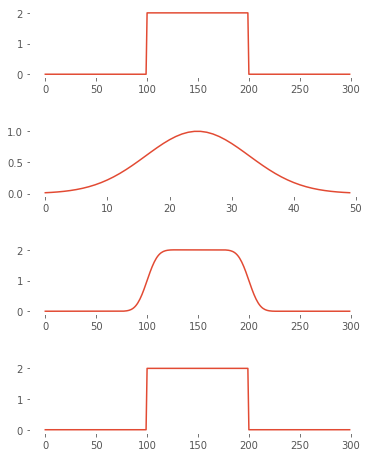

In [82]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Input signal be a squared signal 
signal = np.repeat([0., 2., 0.], 100)

# let us convolute this by applying a gaussian filter 
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )


# calculate the convolution 
filtered = np.convolve(signal, gauss, mode='same') 
deconv,  _ = scipy.signal.deconvolve( filtered, gauss )

#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1

# so we need to expand it by 
s = (len(signal)-n)//2
#plt.rcParams['axes.facecolor'] = 'white'

deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 
 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))
fig.tight_layout(pad=3.0)

ax[0].plot(signal)

ax[1].plot(gauss)

# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss))

ax[3].plot(deconv)

plt.show()   

###  Signal Corelation 

Cross correlation is a standard method of estimating the degree to which two series are correlated .Here we will be corelating  the given signal and comparing corelation with convolution .Correlation is a mathematical operation that is very similar to convolution. Just as with convolution, correlation uses two signals to produce a third signal. This third signal is called the cross-correlation of the two input signals. 

A correlation could be under 3 possible  regions 

- Positive Correlation : Both variables change in the same direction.
- Neutral Correlation  : No relationship in the change of the variables.
- Negative Correlation : Variables change in opposite directions.

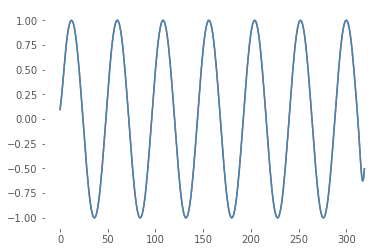

In [91]:
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
import mysignals as sigs


corr_output_signal = signal.correlate(sigs.InputSignal_1kHz_15kHz, Impulse_response,mode ='same')
conv_output_signal = signal.convolve(sigs.InputSignal_1kHz_15kHz, Impulse_response,mode ='same')
fig.tight_layout(pad=3.0)
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(conv_output_signal)
plt.plot(corr_output_signal)
plt.show()


### Time delay calculation between two signals 

Cross-correlations are useful for determining the time delay between two signals 

Real world example :   For determining time delays for the propagation of acoustic signals across a microphone array. After calculating the cross-correlation between the two signals, the maximum of the cross-correlation function indicates the point in time where the signals are best aligned, which basically provides the time delay between the two signals is determined by the  arg max of the cross-correlation

y2 is 1.0001421666192778 behind y1


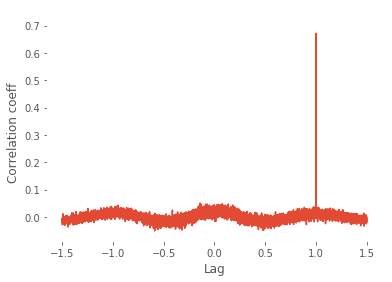

In [102]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np


def lag_finder(y1, y2, sr):
    n = len(y1)
    corr = signal.correlate(y2, y1, mode='same') / np.sqrt(signal.correlate(y1, y1, mode='same')[int(n/2)] * signal.correlate(y2, y2, mode='same')[int(n/2)])

    delay_arr = np.linspace(-0.5*n/sr, 0.5*n/sr, n)
    delay = delay_arr[np.argmax(corr)]
    print('y2 is ' + str(delay) + ' behind y1')

    plt.figure()
    plt.plot(delay_arr, corr)
    plt.title('Lag: ' + str(np.round(delay, 3)) + ' s')
    plt.xlabel('Lag')
    plt.ylabel('Correlation coeff')
    plt.show()


sr = 2345
y = np.linspace(0, 2*np.pi, sr)
y = np.tile(np.sin(y), 5)
y += np.random.normal(0, 5, y.shape)
y1 = y[sr:4*sr]
y2 = y[:3*sr]

lag_finder(y1, y2, sr)

#### Application : 
Key elements of a radar system. Like other echo location systems, radar transmits a short pulse of energy that is reflected by
objects being examined. This makes the received waveform a shifted version of the transmitted waveform, plus random noise.
Detection of a known waveform in a noisy signal is the fundamental problem in echo location. Corelation solves this problem 




## Properties of Convolution 

A linear system's characteristics are completely specified by the system's impulse response, as
governed by the mathematics of convolution. This is the basis of many signal processing
techniques. 
For example: Digital filters are created by designing an appropriate impulse response. 


#### Identity property 

If any function x(t)  is convolved with impulse function δ(t), it results the function itself. Again, convolution of any function with δ (t – t0), it results the shifted function. 

x(t)* δ (t) = x(t) 

x(t)* δ (t – t0) = x(t – t0) 

δ (t)* δ (t) = δ (t) 



#### Commutative

The order in which two signals are convolved makes no difference and the results are identical.In any linear system, the input signal and the system's impulse response can be exchanged without changing the output signal.There can be no particular order . Even though physically it makes no difference Mathematically we can covolve them either way 

![image](img1\commu.jpg)

#### Associative property 

When we Convolve two of the signals to produce an intermediate signal, then convolve the intermediate signal with the third signal to obtain the final result of the system . The associative property provides that the order of the convolutions doesn't matter here and will get us the same result 


![image](img1\assoc.jpg)

The associative property is used  to describe how cascaded systems function .Two or more systems are said to be in a cascade if the output of one system is used as the input for the next system.  The order of the systems can be rearranged without changing the overall response of the cascade.Also any number of cascaded systems can be replaced with a single system. The impulse response of the replacement system is found by convolving the impulse responses of all of the original systems.


#### Distributive property

The distributive property describes the operation of parallel systems with added outputs ,This will helps in simplification of the circuits while analysing . Two or more systems can share the same input x[n] and have their outputs added to produce y[n]. The distributive property allows this combination of systems to be replaced with a single system and also  having an impulse response equal to the sum of the impulse responses of the original systems.
![image](img1\distri.jpg)


### Running sum and First dfference 

Convolution can change discrete signals in similar ways  that resemble integration and
differentiation which we do when processing analog signals . Since the terms "derivative" and "integral" specifically refer
to operations on continuous signals. The discrete operation that mimics the first derivative is called
the first difference. Likewise, the discrete form of the integral is called the Running sum



The running sum is the discrete version
of the integral. Each sample in the
output signal is equal to the sum of all
samples in the input signal to the left.
Note that the impulse response extends
to infinity, a rather nasty feature.

### Program to illustrate running sum 

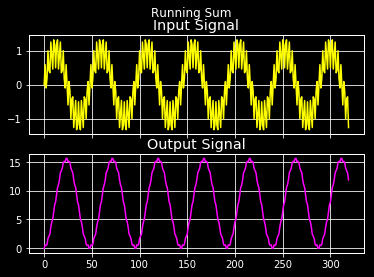

In [71]:
from matplotlib import pyplot as plt
from matplotlib import style
import mysignals as sigs
import numpy as np


output_signal = np.cumsum(sigs.InputSignal_1kHz_15kHz)


style.use('dark_background')

f,plt_arr = plt.subplots(2,sharex=True)
f.suptitle("Running Sum")

plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz,color='yellow')
plt_arr[0].set_title("Input Signal")

plt_arr[1].plot(output_signal,color ='magenta')
plt_arr[1].set_title("Output Signal")

plt.show()


### Running sum program without built in function 

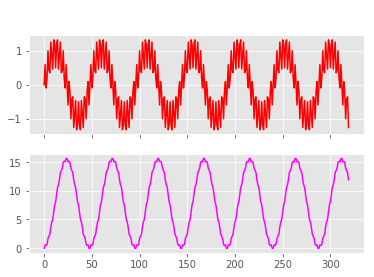

In [105]:
from matplotlib import pyplot as plt
from matplotlib import style
import mysignals as sigs


# funtion which calculates running sum with foe loop 
def calc_running_sum(sig_src_arr,sig_dest_arr):
    
    for x in range(len(sig_dest_arr)):
        sig_dest_arr[x] = 0

    for x in range(len(sig_src_arr)):
        sig_dest_arr[x] =  sig_dest_arr[x-1]+sig_src_arr[x]
        
    style.use('ggplot')
    
    f,plt_arr = plt.subplots(2,sharex=True)
    f.suptitle("Running Sum")

    plt_arr[0].plot(sig_src_arr,color='red')
    plt_arr[0].set_title("Input Signal")

    plt_arr[1].plot(output_signal,color ='magenta')
    plt_arr[1].set_title("Output Signal")

    plt.show()

output_signal =[None]*320
calc_running_sum(sigs.InputSignal_1kHz_15kHz,output_signal)


## First difference 



This is the discrete version of the first
derivative. Each sample in the output
signal is equal to the difference between
adjacent samples in the input signal. In
other words, the output signal is the
slope of the input signal.


#### Program to illustrate First difference  

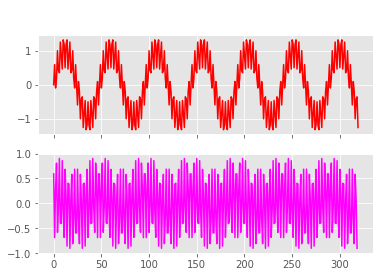

In [104]:
from matplotlib import pyplot as plt
from matplotlib import style
import mysignals as sigs
import numpy as np

#Here we are utilizng a built in function 
output_signal = np.diff(sigs.InputSignal_1kHz_15kHz)

style.use('ggplot')
#style.use('dark_background')

f,plt_arr = plt.subplots(2,sharex=True)
f.suptitle("First Difference")

plt_arr[0].plot(sigs.InputSignal_1kHz_15kHz,color='red')
plt_arr[0].set_title("Input Signal")

plt_arr[1].plot(output_signal,color ='magenta')
plt_arr[1].set_title("Output Signal")

plt.show()



### Program to calculate first difference without built in functions : 

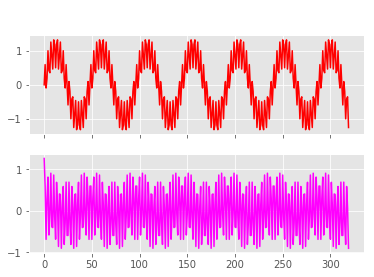

In [103]:
from matplotlib import pyplot as plt
from matplotlib import style
import mysignals as sigs


# Function to do the First difference operation 
def calc_first_difference(sig_src_arr,sig_dest_arr):
    
    #creation of space for storing result 
    for x in range(len(sig_dest_arr)):
        sig_dest_arr[x] =0

    #Taking the difference between the present and previous result (x-1)
    for x in range(len(sig_src_arr)):
        sig_dest_arr[x] = sig_src_arr[x] - sig_src_arr[x-1]
        

    style.use('ggplot')
    

    f,plt_arr = plt.subplots(2,sharex=True)
    f.suptitle("First Difference")

    plt_arr[0].plot(sig_src_arr,color='red')
    plt_arr[0].set_title("Input Signal")

    plt_arr[1].plot(sig_dest_arr,color ='magenta')
    plt_arr[1].set_title("Output Signal")

    plt.show()


#Creation of empty array to feed output 
output_signal =[None]*320

# calling the function with our signal 
calc_first_difference(sigs.InputSignal_1kHz_15kHz,output_signal)

